# Homework 6

Preparing the data

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-23 17:57:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   667KB/s    in 2.1s    

2023-10-23 17:57:23 (667 KB/s) - ‘housing.csv’ saved [1423529/1423529]



### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("housing.csv")

df = df[df['ocean_proximity'].map(lambda x: x in ("<1H OCEAN", "INLAND"))]
df = df.fillna(0)
# df['median_house_value'] = np.log1p(df['median_house_value'])
df



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
from sklearn.model_selection import train_test_split

y_col = 'median_house_value'


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

y_train, y_val, y_test = (
    np.log1p(df_train[y_col]),
    np.log1p(df_val[y_col]),
    np.log1p(df_test[y_col]),
)

del df_train[y_col]
del df_val[y_col]
del df_test[y_col]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train[:5], y_val[:5], y_test[:5]

(1065     11.359786
 6783     12.538612
 4749     12.466130
 17810    12.500237
 8608     12.591338
 Name: median_house_value, dtype: float64,
 19250    12.091228
 18693    12.141539
 11842    11.478344
 7230     11.940159
 8173     12.367345
 Name: median_house_value, dtype: float64,
 18117    12.760822
 16227    11.394153
 2695     11.215880
 6497     12.008847
 9609     11.054075
 Name: median_house_value, dtype: float64)

In [13]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [10]:
X_train

<10039x10 sparse matrix of type '<class 'numpy.float64'>'
	with 90351 stored elements in Compressed Sparse Row format>

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [17]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



The feature that is used for splitting the data is `ocean_proximity`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [27]:
y_pred = rf.predict(X_val)
rmse_val = rmse(y_val, y_pred)

print(f"The RMSE score is: {round(rmse_val, 3)}")

The RMSE score is: 0.239


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160




In [33]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse_val = rmse(y_val, y_pred)
    
    scores.append((n, rmse_val))

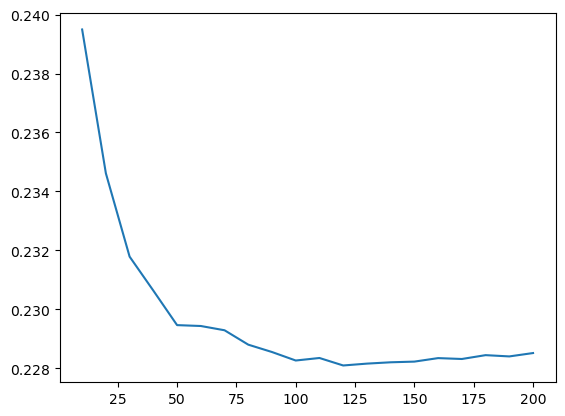

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [38]:
df_scores['rmse_rounded'] = df_scores['rmse'].map(lambda x: round(x, 3))
df_scores

,n_estimators,rmse,rmse_rounded
0,10,0.239495,0.239
1,20,0.234613,0.235
2,30,0.231784,0.232
3,40,0.230631,0.231
4,50,0.229460,0.229
5,60,0.229430,0.229
6,70,0.229285,0.229
7,80,0.228797,0.229
8,90,0.228547,0.229
9,100,0.228259,0.228


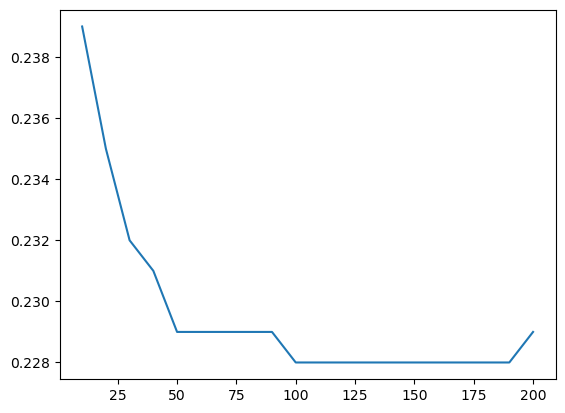

In [39]:
plt.plot(df_scores.n_estimators, df_scores.rmse_rounded)

At the `n_estimators=50`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [70]:
scores_2 = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        print(f"Training rf on max_d={d}, n_est={n}")
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_val = rmse(y_val, y_pred)

        scores_2.append((d, n, rmse_val, round(rmse_val, 3)))


Training rf on max_d=10, n_est=10
Training rf on max_d=10, n_est=20
Training rf on max_d=10, n_est=30
Training rf on max_d=10, n_est=40
Training rf on max_d=10, n_est=50
Training rf on max_d=10, n_est=60
Training rf on max_d=10, n_est=70
Training rf on max_d=10, n_est=80
Training rf on max_d=10, n_est=90
Training rf on max_d=10, n_est=100
Training rf on max_d=10, n_est=110
Training rf on max_d=10, n_est=120
Training rf on max_d=10, n_est=130
Training rf on max_d=10, n_est=140
Training rf on max_d=10, n_est=150
Training rf on max_d=10, n_est=160
Training rf on max_d=10, n_est=170
Training rf on max_d=10, n_est=180
Training rf on max_d=10, n_est=190
Training rf on max_d=10, n_est=200
Training rf on max_d=15, n_est=10
Training rf on max_d=15, n_est=20
Training rf on max_d=15, n_est=30
Training rf on max_d=15, n_est=40
Training rf on max_d=15, n_est=50
Training rf on max_d=15, n_est=60
Training rf on max_d=15, n_est=70
Training rf on max_d=15, n_est=80
Training rf on max_d=15, n_est=90
Tra

In [ ]:
columns = ['max_depth', 'n_estimators', 'rmse', 'rmse_rounded']
df_scores = pd.DataFrame(scores_2, columns=columns)

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [40]:
rf = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse_val = rmse(y_val, y_pred)

In [41]:
rf.feature_importances_

array([0.01537979, 0.03197466, 0.10069718, 0.09101731, 0.33443216,
       0.32881959, 0.03677885, 0.02650476, 0.01486924, 0.01952648])

<BarContainer object of 10 artists>

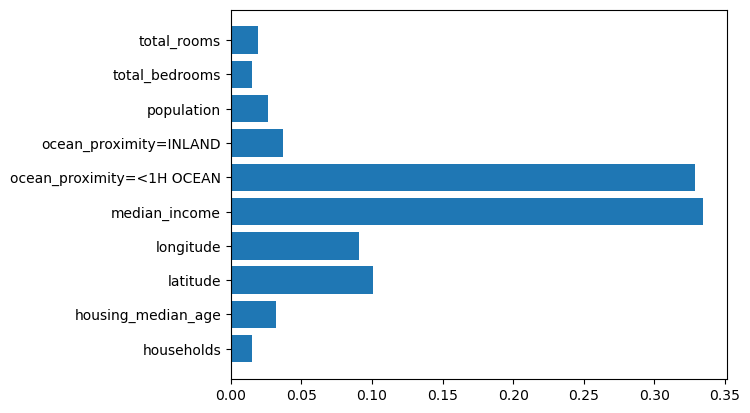

In [42]:
plt.barh(dv.get_feature_names_out(), rf.feature_importances_)


It's `median_income`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


In [43]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 409.5 kB/s eta 0:00:0000:0100:15


In [55]:
import xgboost as xgb

features = list(map(lambda x: x.replace("<", "less than"), dv.get_feature_names_out().tolist()))
print(features)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

['households', 'housing_median_age', 'latitude', 'longitude', 'median_income', 'ocean_proximity=less than1H OCEAN', 'ocean_proximity=INLAND', 'population', 'total_bedrooms', 'total_rooms']


In [56]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [65]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=5)

In [66]:
s = output.stdout
print(s)


[0]	train-rmse:0.44304	val-rmse:0.44359
[5]	train-rmse:0.25280	val-rmse:0.27018
[10]	train-rmse:0.21620	val-rmse:0.24424
[15]	train-rmse:0.20079	val-rmse:0.23683
[20]	train-rmse:0.18960	val-rmse:0.23513
[25]	train-rmse:0.17876	val-rmse:0.23051
[30]	train-rmse:0.17074	val-rmse:0.22973
[35]	train-rmse:0.16331	val-rmse:0.22722
[40]	train-rmse:0.15786	val-rmse:0.22694
[45]	train-rmse:0.15266	val-rmse:0.22590
[50]	train-rmse:0.14730	val-rmse:0.22380
[55]	train-rmse:0.14375	val-rmse:0.22307
[60]	train-rmse:0.13930	val-rmse:0.22250
[65]	train-rmse:0.13617	val-rmse:0.22282
[70]	train-rmse:0.13318	val-rmse:0.22223
[75]	train-rmse:0.12936	val-rmse:0.22156
[80]	train-rmse:0.12659	val-rmse:0.22148
[85]	train-rmse:0.12353	val-rmse:0.22143
[90]	train-rmse:0.11972	val-rmse:0.22091
[95]	train-rmse:0.11686	val-rmse:0.22080
[99]	train-rmse:0.11475	val-rmse:0.22072



In [67]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=5)

In [69]:
s = output.stdout
print(s)

[0]	train-rmse:0.52380	val-rmse:0.52215
[5]	train-rmse:0.37851	val-rmse:0.38190
[10]	train-rmse:0.30462	val-rmse:0.31335
[15]	train-rmse:0.26784	val-rmse:0.28121
[20]	train-rmse:0.24801	val-rmse:0.26561
[25]	train-rmse:0.23358	val-rmse:0.25550
[30]	train-rmse:0.22225	val-rmse:0.24766
[35]	train-rmse:0.21413	val-rmse:0.24283
[40]	train-rmse:0.20733	val-rmse:0.23897
[45]	train-rmse:0.20220	val-rmse:0.23631
[50]	train-rmse:0.19700	val-rmse:0.23356
[55]	train-rmse:0.19285	val-rmse:0.23151
[60]	train-rmse:0.18887	val-rmse:0.22965
[65]	train-rmse:0.18555	val-rmse:0.22859
[70]	train-rmse:0.18233	val-rmse:0.22750
[75]	train-rmse:0.17902	val-rmse:0.22644
[80]	train-rmse:0.17604	val-rmse:0.22572
[85]	train-rmse:0.17288	val-rmse:0.22466
[90]	train-rmse:0.17040	val-rmse:0.22432
[95]	train-rmse:0.16792	val-rmse:0.22401
[99]	train-rmse:0.16604	val-rmse:0.22328



It's the XGB params with eta=`0.3`